# CV Assignment 2 - Practical
### Submitted by:
### Vivek Bharti
### vb1275@nyu.edu

## Exercise 1

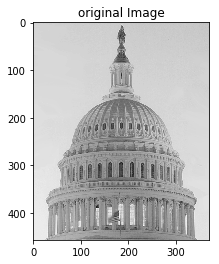

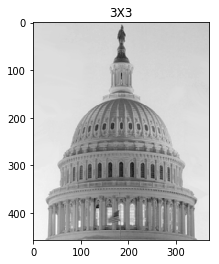

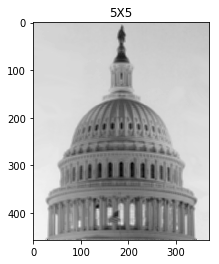

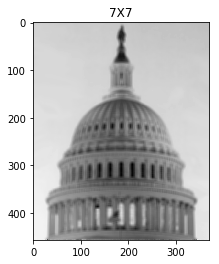

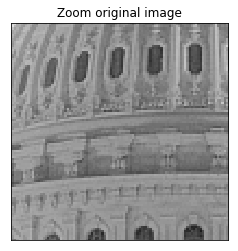

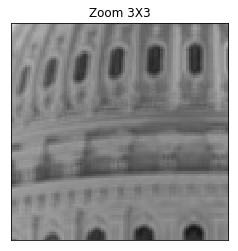

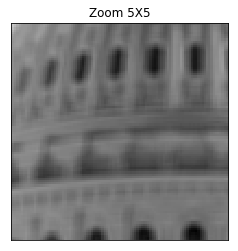

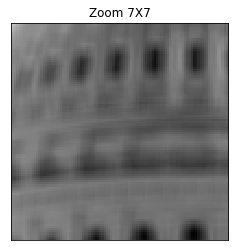

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading input image
imageArray_1 = cv2.imread('capitol.jpg')

# coverting image to gray scale
grayImage_1 = 0.2989*imageArray_1[:,:,0] + 0.5870*imageArray_1[:,:,1] + 0.1140*imageArray_1[:,:,2]

# plotting image
imgplot = plt.imshow(grayImage_1, cmap = 'gray')
plt.title("original Image")
plt.show()

sizeX = len(grayImage_1)    
sizeY = len(grayImage_1[0]) 

# Smoothing func
def smoothing(k):
    kernel = np.ones((k,k),np.float32)/(k*k)
    out_img = np.copy(grayImage_1)
    dim = k//2
    for i in range (dim, sizeX - dim):
        for j in range (dim, sizeY - dim):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            out_img[i][j] = (sum(map(sum, kernel * grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1])))
    return(out_img)

out_img_3 = smoothing(3)

# print (out_img)

# 3X3 image
imgplot = plt.imshow(out_img_3, cmap = 'gray')
plt.title("3X3")
plt.show()

# 5X5 image
out_img_5 = smoothing(5)
            
imgplot = plt.imshow(out_img_5, cmap = 'gray')
plt.title("5X5")
plt.show()

# 7X7 image
out_img_7 = smoothing(7)
            
imgplot = plt.imshow(out_img_7, cmap = 'gray')
plt.title("7X7")
plt.show()

#zoomed images

imgplot = plt.imshow(grayImage_1, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.xlim(100, 200)
plt.ylim(300, 200)
plt.title("Zoom original image")
plt.show()

#3X3
imgplot = plt.imshow(out_img_3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.xlim(100, 200)
plt.ylim(300, 200)
plt.title("Zoom 3X3")
plt.show()


#5X5
imgplot = plt.imshow(out_img_5, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.xlim(100, 200)
plt.ylim(300, 200)
plt.title("Zoom 5X5")
plt.show()


#7X7
imgplot = plt.imshow(out_img_7, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.xlim(100, 200)
plt.ylim(300, 200)
plt.title("Zoom 7X7")
plt.show()



## Exercise 2

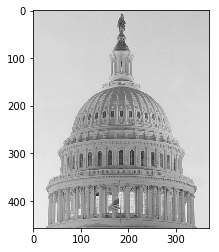

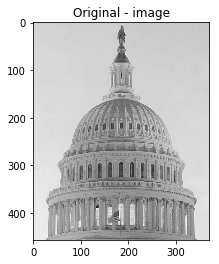

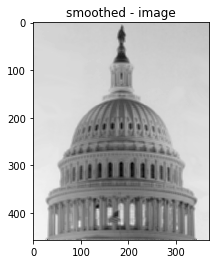

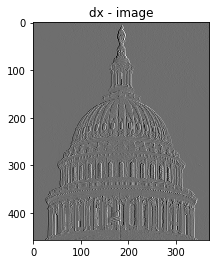

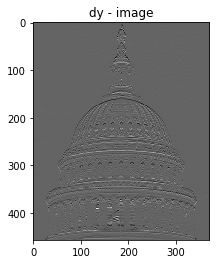

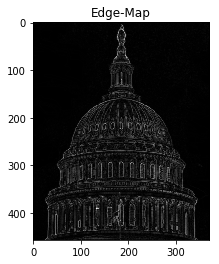

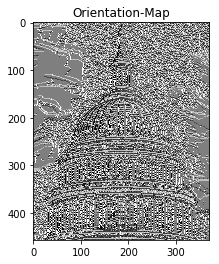

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading input image
imageArray_1 = cv2.imread('capitol.jpg')

# coverting image to gray scale
grayImage_1 = 0.2989*imageArray_1[:,:,0] + 0.5870*imageArray_1[:,:,1] + 0.1140*imageArray_1[:,:,2]

# plotting image
imgplot = plt.imshow(grayImage_1, cmap = 'gray')
plt.show()

# sizeY = gray_image.shape[1]    #Number of columns
# sizeX = gray_image.shape[0] #Number of rows

sizeX = len(grayImage_1)    
sizeY = len(grayImage_1[0]) 

# Smoothing func
def smoothing(k,grayImage_1):
    kernel = np.ones((k,k),np.float32)/(k*k)
    out_img = np.copy(grayImage_1)
    dim = k//2
    for i in range (dim, sizeX - dim):
        for j in range (dim, sizeY - dim):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            out_img[i][j] = (sum(map(sum, kernel * grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1])))
    return(out_img)

# edge detection func
def edgeDetection(grayImage_1):
    
    med_img = smoothing(5,grayImage_1)

#   Filter kernel  
    Mx = np.array([-0.5, 0, 0.5]).reshape(1,3)
    My = np.array([-0.5, 0, 0.5]).reshape(1,3)
    
    # Apply kernels to the image
    Ix = np.zeros(med_img.shape)
    Iy = np.zeros(med_img.shape)
    
# Applying Dx kernel
    for i in range (1, sizeX - 1):
        for j in range (1, sizeY - 1):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            Ix[i][j] = (sum(map(sum, Mx * grayImage_1[i,j-1:j+1+1])))

# Applying Dy kernel    
    for i in range (1, sizeX - 1):
        for j in range (1, sizeY - 1):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            Iy[i][j] = (sum(map(sum, My * grayImage_1[i-1:i+1+1,j])))

# for edge map
    Gradient = np.hypot(Ix, Iy)
    
# for orientation map
    Direction = np.arctan2(Iy, Ix)
    return(med_img, Ix, Iy, Gradient, Direction)

# Calling edge detection function
med_img, Ix, Iy, Gradient, Direction = edgeDetection(grayImage_1)

# original image
imgplot = plt.imshow(grayImage_1, cmap = 'gray')
plt.title("Original - image")
plt.show()

# Smoothed
imgplot = plt.imshow(med_img, cmap = 'gray')
plt.title("smoothed - image")
plt.show()
    
# dx
imgplot = plt.imshow(Ix, cmap = 'gray')
plt.title("dx - image")
plt.show()

# dy
imgplot = plt.imshow(Iy, cmap = 'gray')
plt.title("dy - image")
plt.show()

# Gradient
imgplot = plt.imshow(Gradient, cmap = 'gray')
plt.title("Edge-Map")
plt.show()

# direction
imgplot = plt.imshow(Direction, cmap = 'gray')
plt.title("Orientation-Map")
plt.show()



## Exercise 3

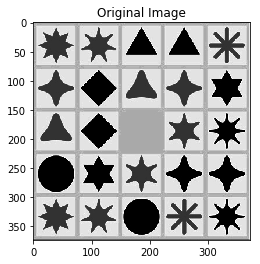

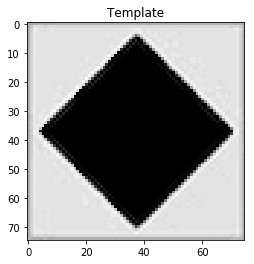

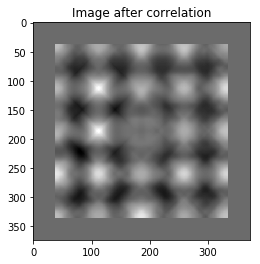

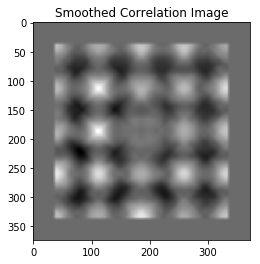

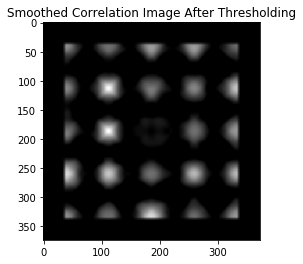

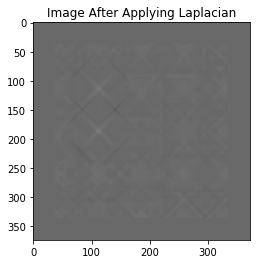

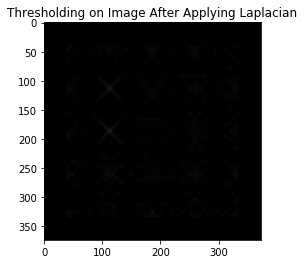

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import math 

# Reading input image
image = cv2.imread('shapes.jpg')

# coverting image to gray scale
gray_image = 0.2989*image[:,:,0] + 0.5870*image[:,:,1] + 0.1140*image[:,:,2]

# Reading input image
kernel = cv2.imread('Capture_Diamond.png')

# coverting image to gray scale
kernel_gray_image = 0.2989*kernel[:,:,0] + 0.5870*kernel[:,:,1] + 0.1140*kernel[:,:,2]

# plotting image
imgplot = plt.imshow(gray_image, cmap = 'gray')
plt.title("Original Image")
plt.show()

#plotting template
imgplot = plt.imshow(kernel_gray_image, cmap = 'gray')
plt.title("Template")
plt.show()

sizeY_image = gray_image.shape[1]    #Number of columns
sizeX_image = gray_image.shape[0] #Number of rows

sizeY_kernel = kernel_gray_image.shape[1]    #Number of columns
sizeX_kernel = kernel_gray_image.shape[0] #Number of rows

#Mean of an image
avg_value_of_kernel = np.average(kernel_gray_image)


avg_value_of_image = np.average(gray_image)


# image smoothing func
def smoothing(grayImage_1,k):
    kernel = np.ones((k,k),np.float32)/(k*k)
    out_img = np.zeros(gray_image.shape)
    dim = k//2
    for i in range (dim, sizeX_image - dim):
        for j in range (dim, sizeY_image - dim):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            out_img[i][j] = (sum(map(sum, kernel * grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1])))
    return(out_img)

# Thresholoding func
def thresholding(image, n):
    thresh_val = n
    out_image = np.zeros(gray_image.shape)
    for i in range(0, sizeX_image):
        for j in range(0, sizeY_image):
            if (image[i][j]<thresh_val):
                out_image[i][j] = 0
            else:
                out_image[i][j] = image[i][j]
    return(out_image)


#Subtracting mean from each pixel to get zero mean pixel
zero_mean_kernel_gray_image = np.zeros(kernel_gray_image.shape)

for i in range(sizeX_kernel):
    for j in range(sizeY_kernel):
        zero_mean_kernel_gray_image[i][j] = kernel_gray_image[i][j] - avg_value_of_kernel

# Applying Correlation Image        
correl_img = np.zeros(gray_image.shape)
   
dim_X = sizeX_kernel//2
dim_Y = sizeY_kernel//2

for i in range(dim_X, sizeX_image - dim_X ):
    for j in range(dim_Y, sizeY_image -  dim_Y ):
        correl_img[i][j] = sum(map(sum, zero_mean_kernel_gray_image*(gray_image[i-dim_X:i+sizeX_kernel-dim_X, j-dim_Y:j+sizeY_kernel-dim_Y] - avg_value_of_image)))

# plotting image
imgplot = plt.imshow(correl_img, cmap = 'gray')
plt.title("Image after correlation")
plt.show()


#image smoothing correl_img
smoothed_correl_image = np.zeros(gray_image.shape)

smoothed_correl_image = smoothing(correl_img, 5)

# Threshold smoothed image
Thresh_img = np.zeros(gray_image.shape)

Thresh_img = thresholding(smoothed_correl_image, .5)

# plotting image after smoothing the correlationed image
imgplot = plt.imshow(smoothed_correl_image, cmap = 'gray')
plt.title("Smoothed Correlation Image")
plt.show()

# plotting image after thresholding
imgplot = plt.imshow(Thresh_img, cmap = 'gray')
plt.title("Smoothed Correlation Image After Thresholding")
plt.show()

# Applying Laplacian
laplacian = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]]).reshape(3, 3)

img_peaked = np.zeros(gray_image.shape)
for i in range(1,sizeX_image - 1):
    for j in range(1, sizeY_image - 1):
        img_peaked[i, j] = (laplacian*smoothed_correl_image[i-1:i+2, j-1:j+2]).sum()

# plotting image after thresholding
imgplot = plt.imshow(img_peaked, cmap = 'gray')
plt.title("Image After Applying Laplacian")
plt.show()

# Threshold smoothed image
Thresh_img_laplacian = np.zeros(gray_image.shape)

Thresh_img_laplacian = thresholding(img_peaked,.5)

# plotting image after thresholding
imgplot = plt.imshow(Thresh_img_laplacian, cmap = 'gray')
plt.title("Thresholding on Image After Applying Laplacian")
plt.show()
